## Cleaning Data -> Missing Data

In [68]:
import pandas as pd
import numpy as np
from scipy import stats
from utils import setup_project_root

setup_project_root()

WindowsPath('C:/Users/zak/Projects/PycharmProjects/data-science')

In [66]:
diabetes = pd.read_csv(r'data/diabetes.csv')

In [67]:
diabetes['Diastolic_BP'].corr(diabetes['Glucose'])

np.float64(0.2231917782495421)

In [16]:
stats.pearsonr(diabetes['Diastolic_BP'], diabetes['Glucose'])

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

## Dealing with missing data

- MAR: Missing at Random - the good ones.
    - Not coming from a systematic error
    - Low in proportion (5% - 10%)
    - Lack of/no apparent correlation to variables in terms of missing data
    - Actions available after identification = Imputation


- MNAR: Missing not at random - the bad ones.
    - Systematic error involved
    - High proportion > 40%
    - Strong evidence of correlation
    - Actions available after identification = Imputation


- MCAR: Missing Completely at Random
    - A low version of MAR


In [17]:
diabetes.isnull().sum()
diabetes.isnull().mean()

Pregnant             0.000000
Glucose              0.006510
Diastolic_BP         0.045573
Skin_Fold            0.295573
Serum_Insulin        0.486979
BMI                  0.014323
Diabetes_Pedigree    0.000000
Age                  0.000000
Class                0.000000
dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='0', ylabel='index'>

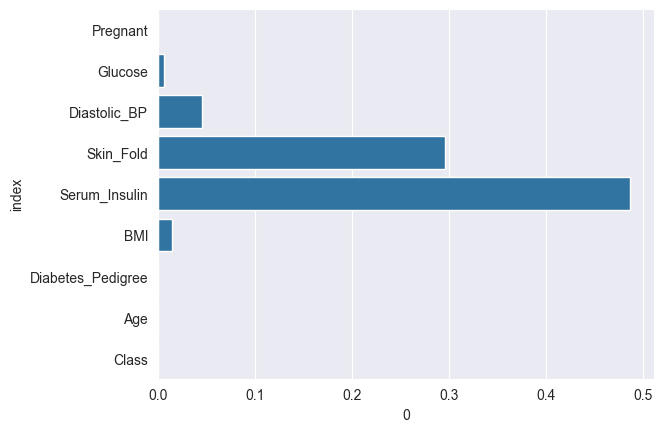

In [19]:
missing_proportions = diabetes.isnull().mean().reset_index()
sns.barplot(missing_proportions, y='index', x=0)

In [20]:
import missingno as msno

<Axes: >

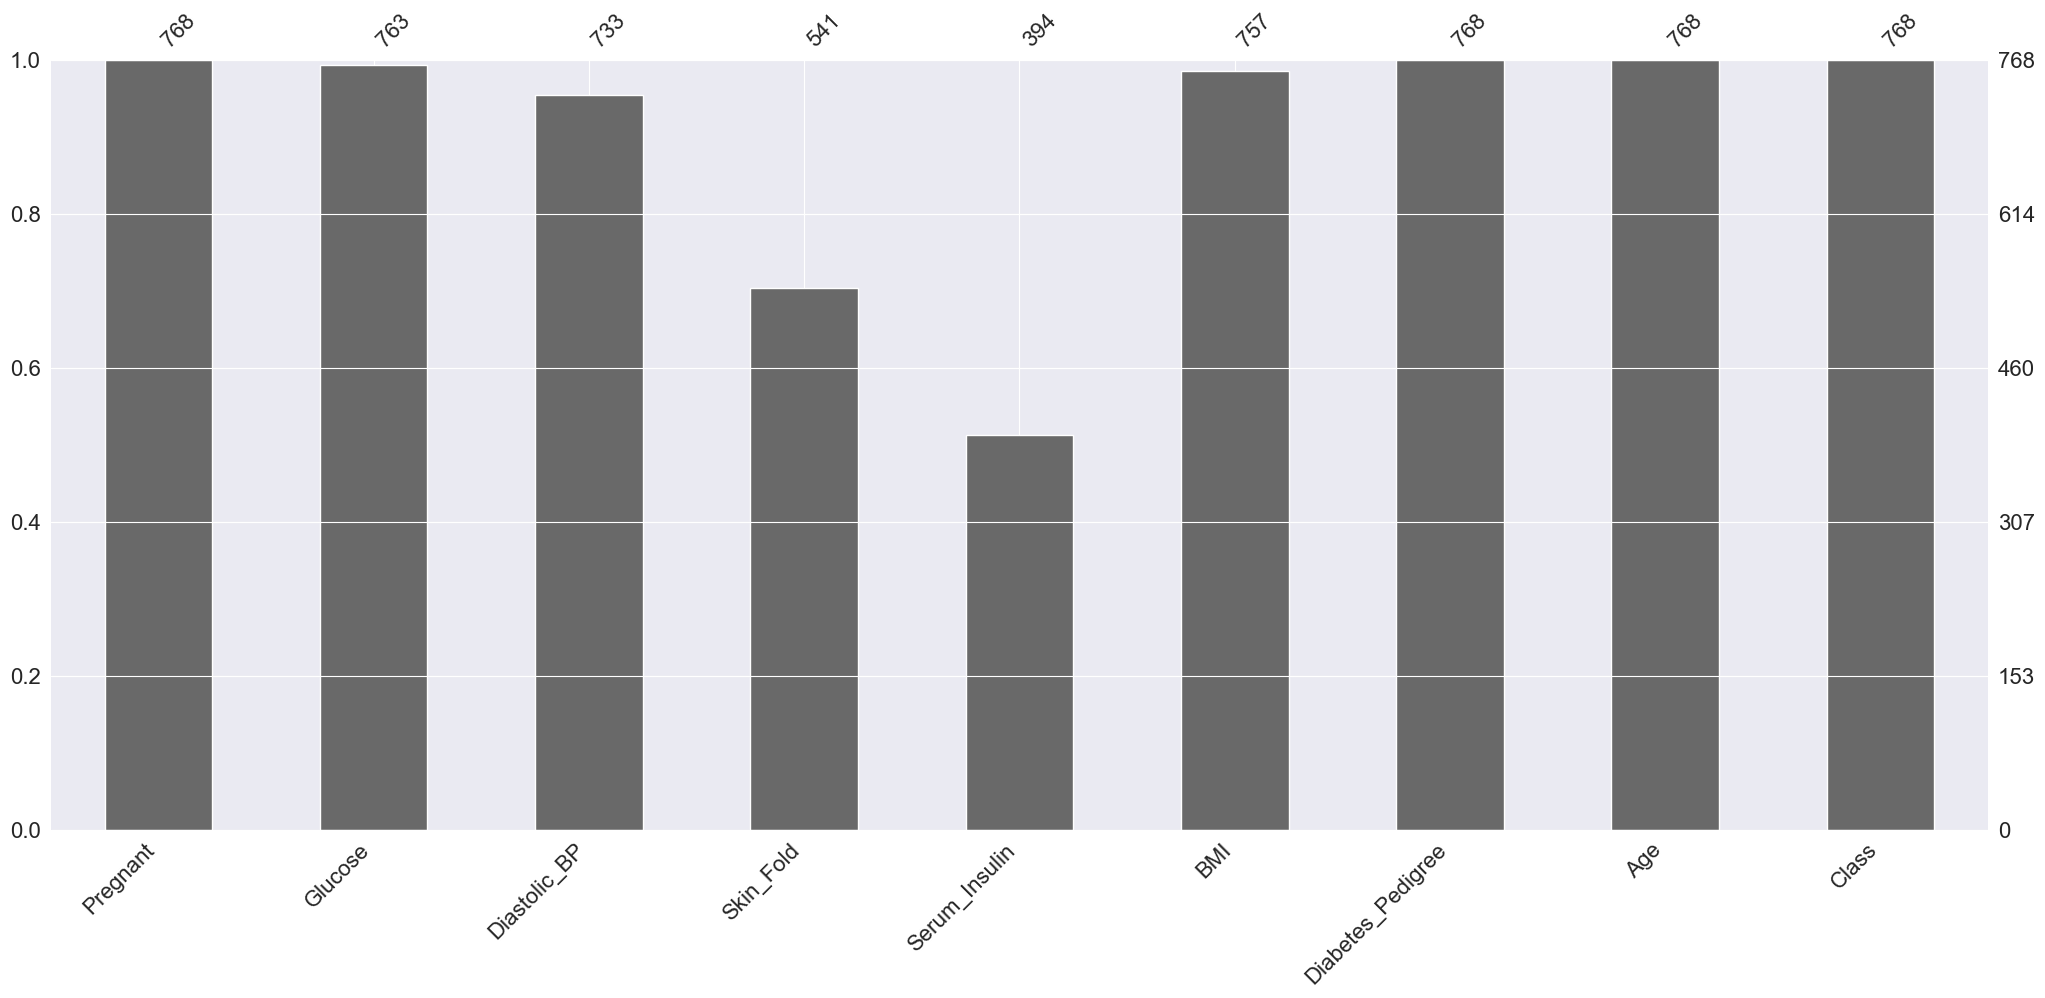

In [21]:
msno.bar(diabetes)

<Axes: >

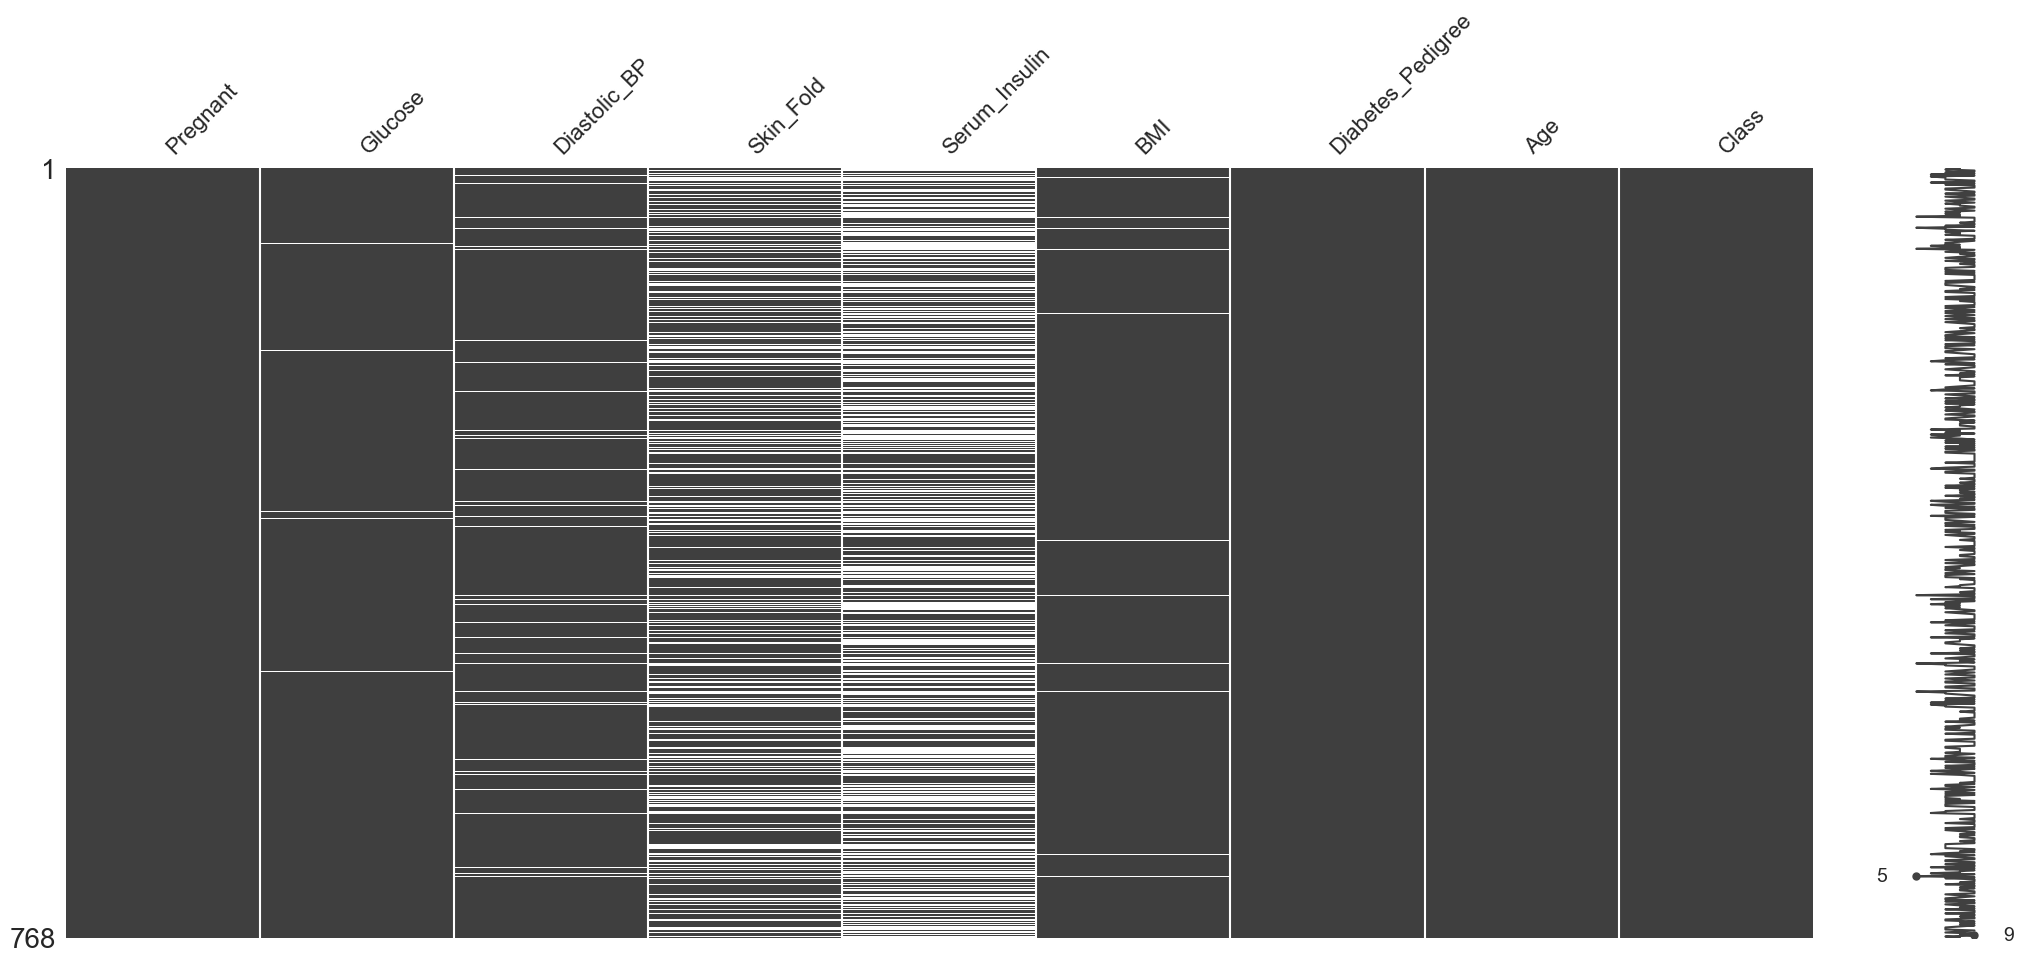

In [22]:
msno.matrix(diabetes)

<Axes: >

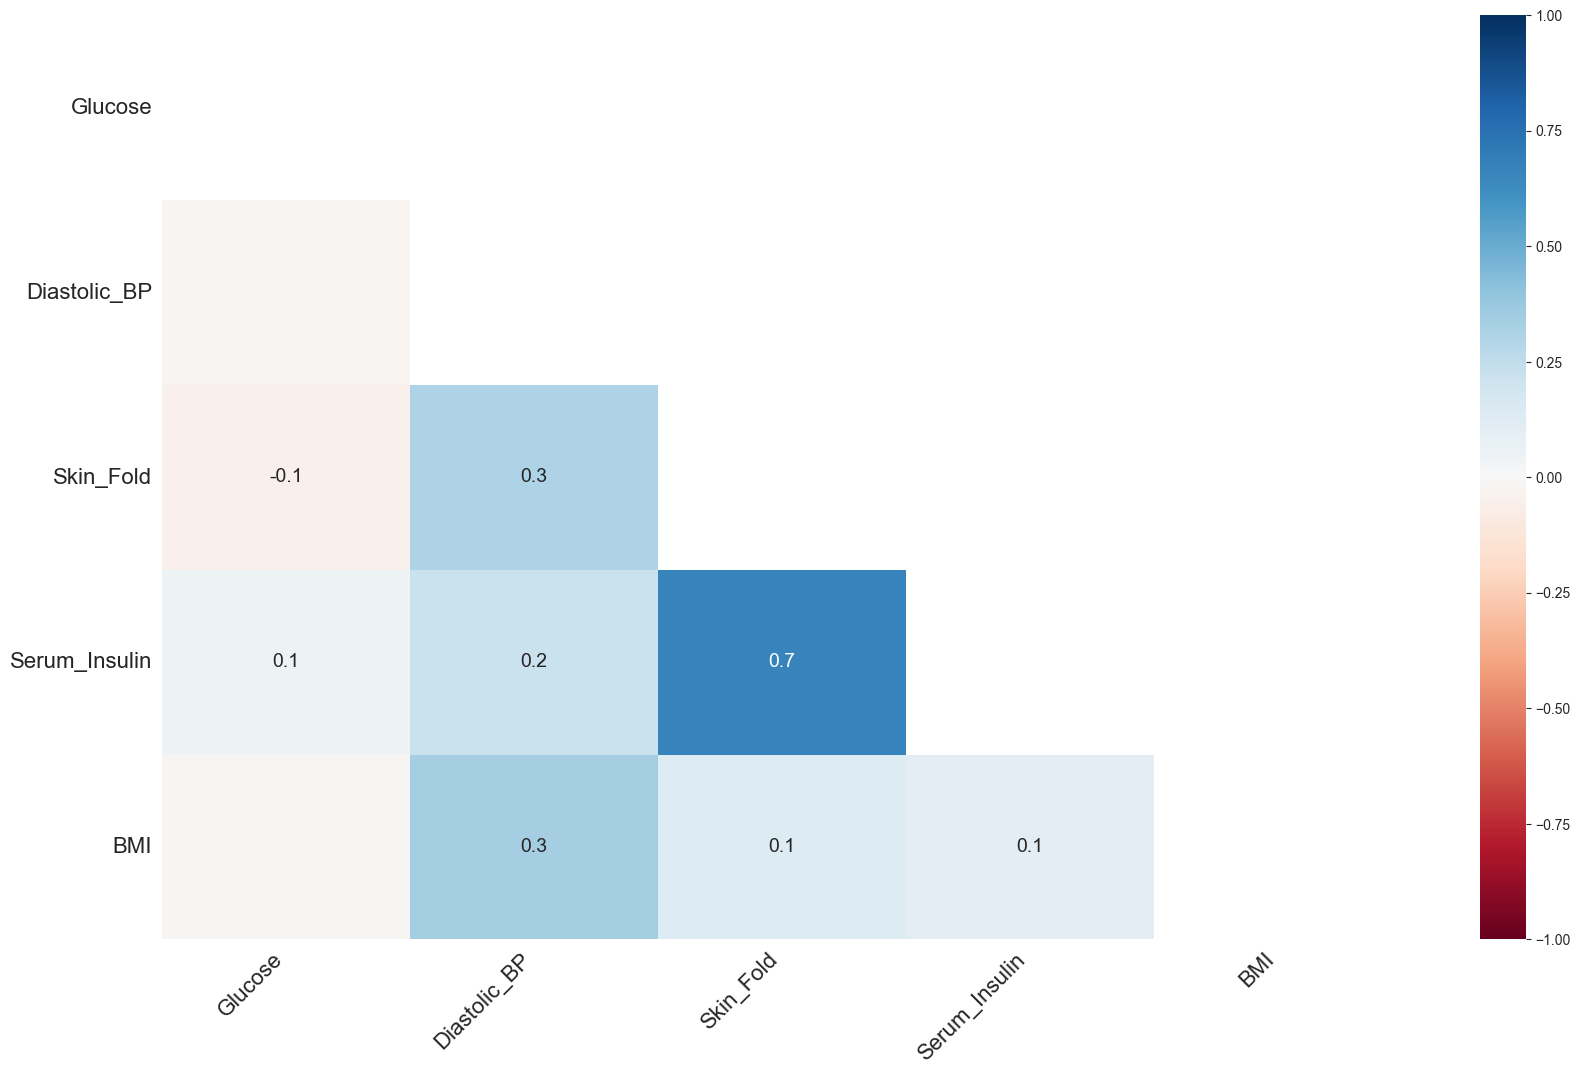

In [23]:
msno.heatmap(diabetes)

In [24]:
matrix = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [3, 2, 3]])
matrix

array([[1, 0, 1],
       [0, 1, 0],
       [3, 2, 3]])

In [25]:
import pandas as pd
from scipy import stats
import os

os.getcwd()

'C:\\Users\\zak\\Projects\\PycharmProjects\\data-science'

In [28]:
air_quality = pd.read_csv(r'data/air-quality.csv')

In [29]:
air_quality

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56
...,...,...,...,...,...
148,1976-09-26,30.0,193.0,6.9,70
149,1976-09-27,NaN,145.0,13.2,77
150,1976-09-28,14.0,191.0,14.3,75
151,1976-09-29,18.0,131.0,8.0,76


In [30]:
air_quality['Ozone'].corr(air_quality['Wind'])

np.float64(-0.6015465298889496)

In [31]:
stats.pearsonr(air_quality['Ozone'], air_quality['Wind'])

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [32]:
air_quality.isnull().sum()
air_quality.isnull().mean()

Date     0.000000
Ozone    0.241830
Solar    0.045752
Wind     0.000000
Temp     0.000000
dtype: float64

In [33]:
import seaborn as sns

<Axes: xlabel='0', ylabel='index'>

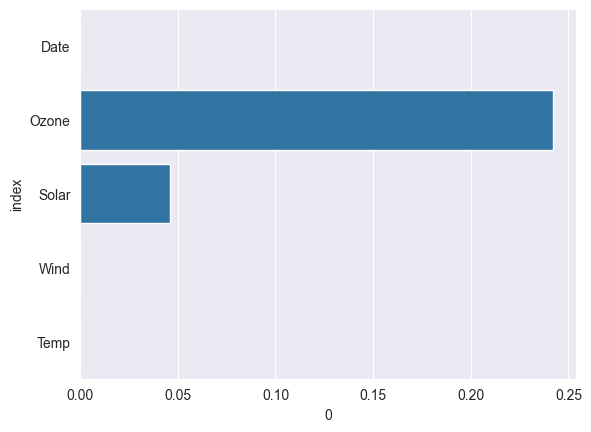

In [34]:
missing_proportions = air_quality.isnull().mean().reset_index()
sns.barplot(missing_proportions, y='index', x=0)

Approx one quarter of Ozone data is missing.

Is the missing data just random?

In [35]:
import missingno as msno

<Axes: >

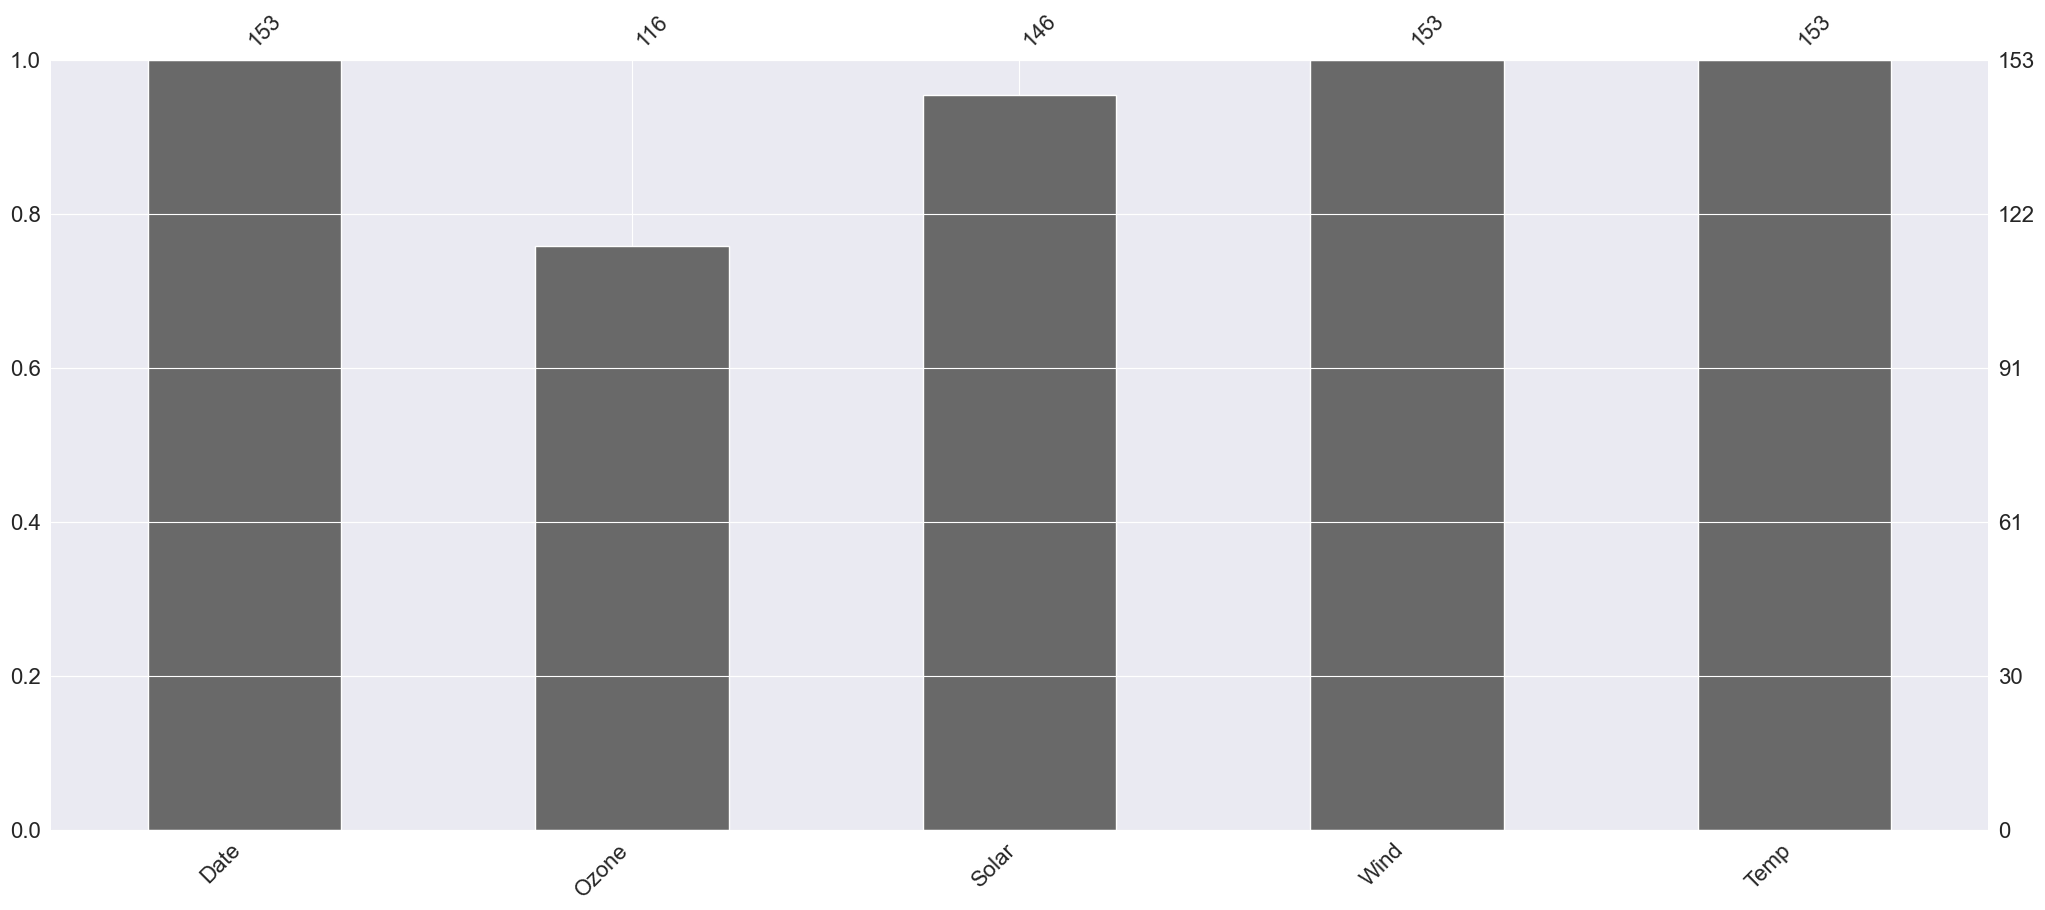

In [36]:
msno.bar(air_quality)

<Axes: >

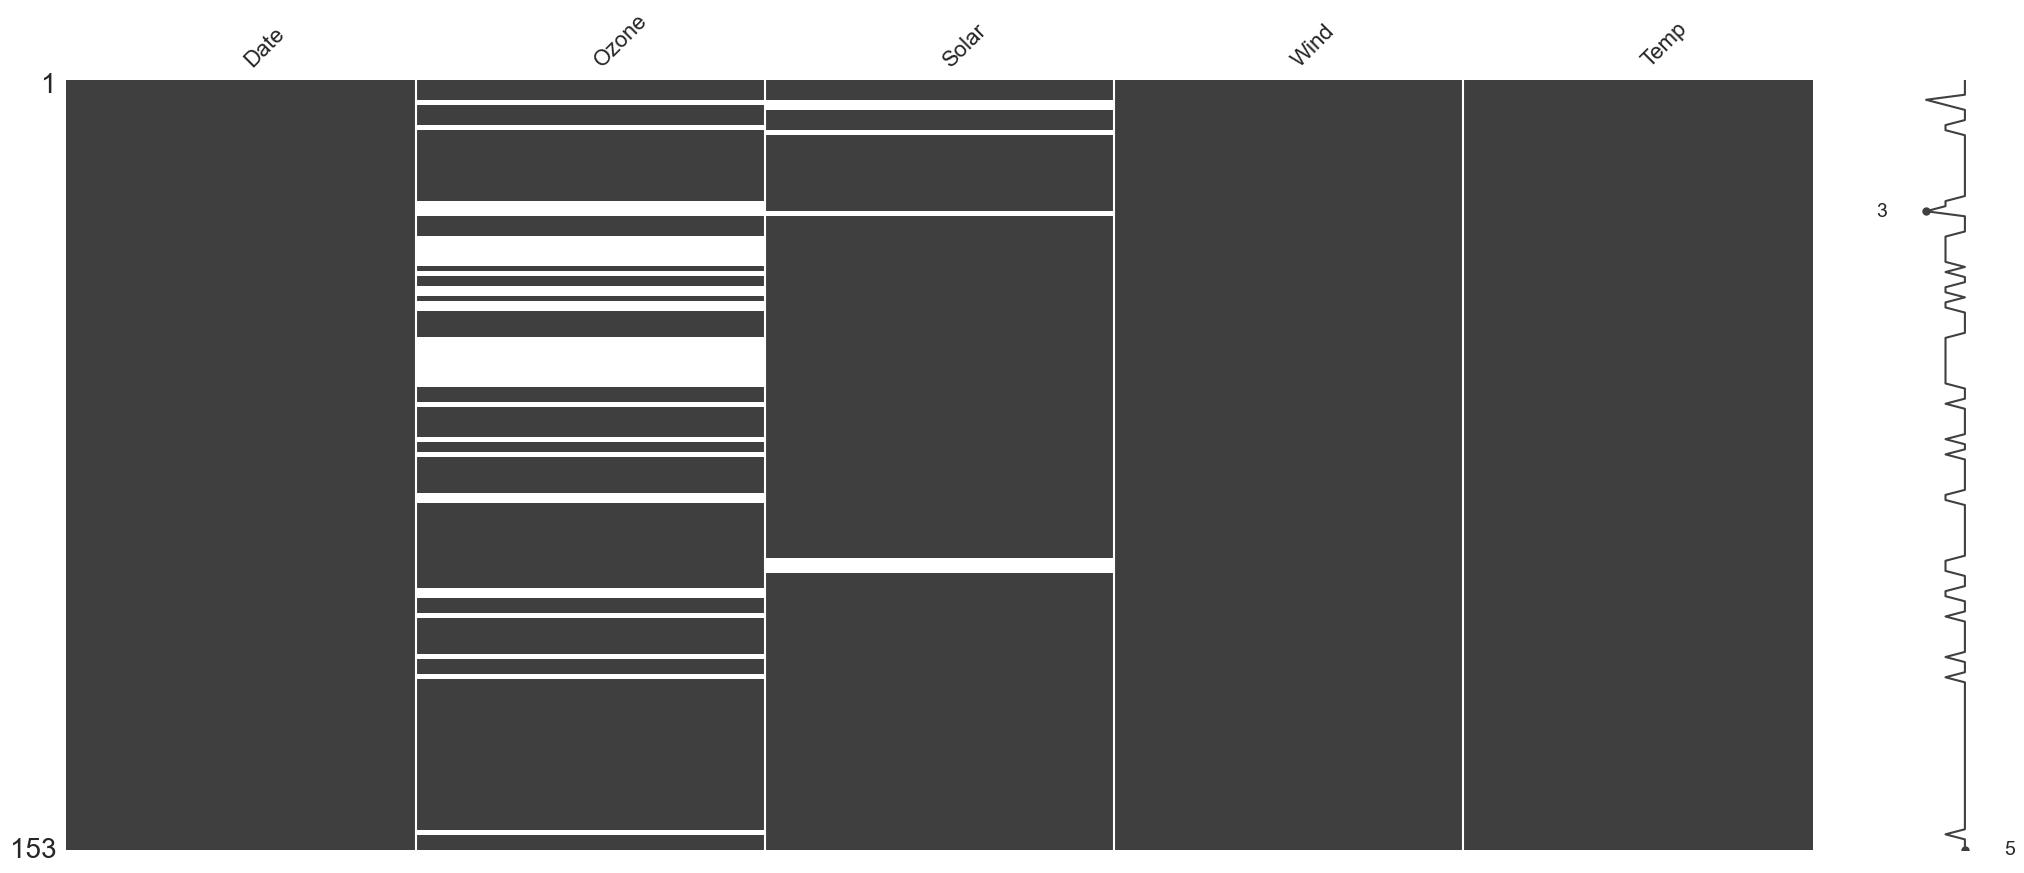

In [37]:
msno.matrix(air_quality)

<llm-snippet-file>01_cleaning_data.ipynb</llm-snippet-file>


<Axes: >

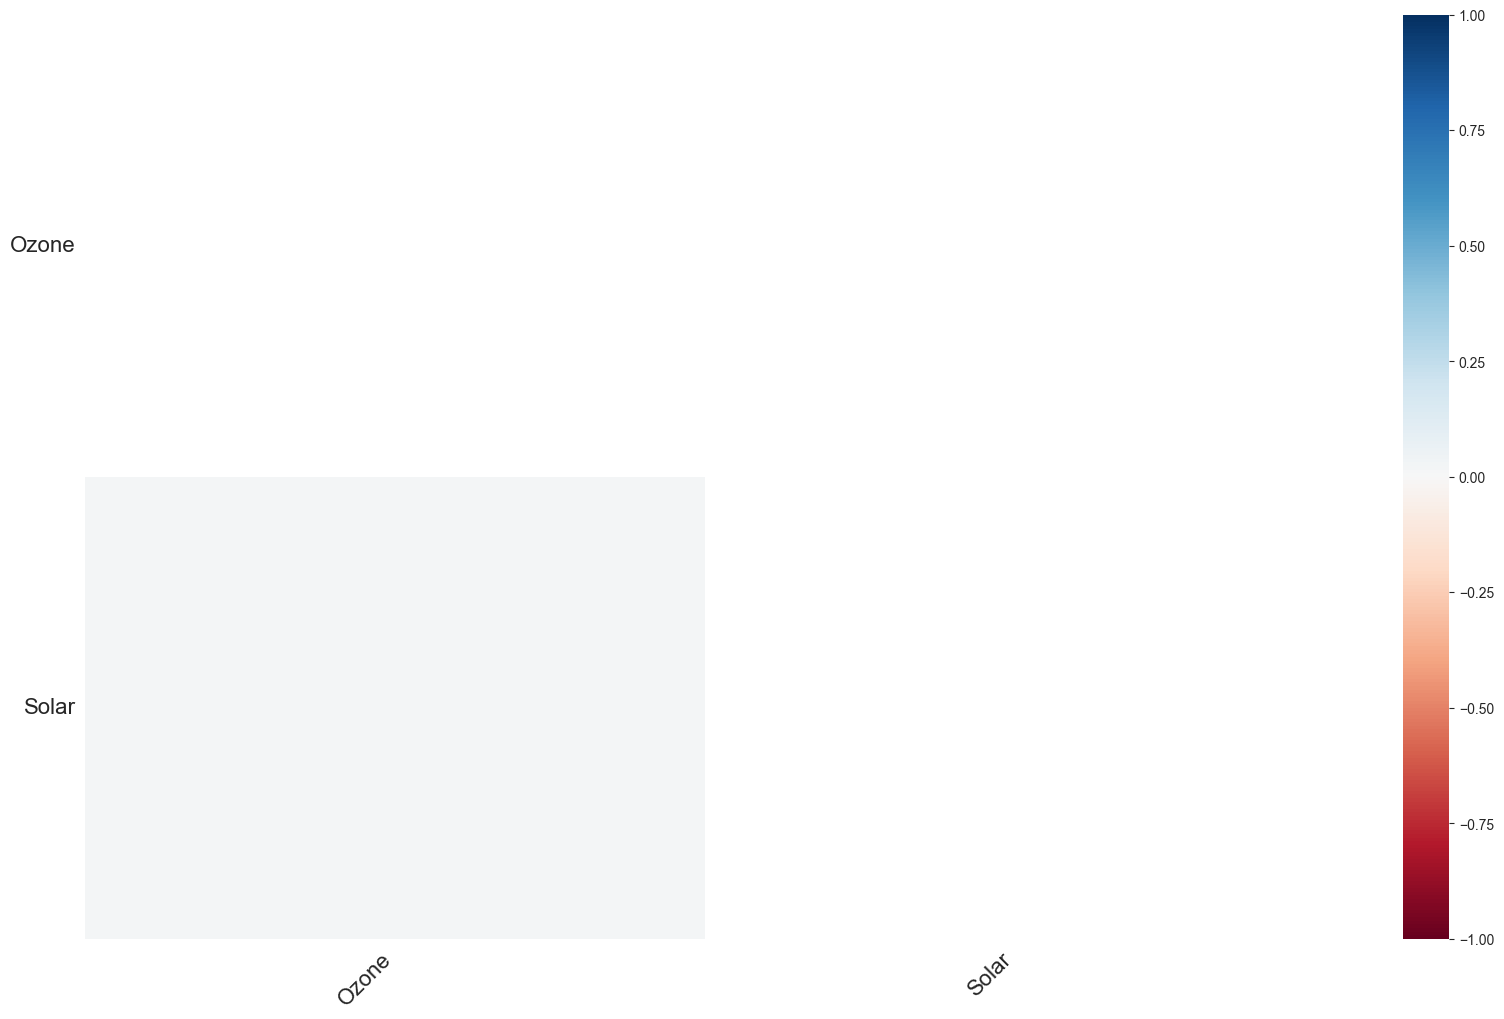

In [38]:
msno.heatmap(air_quality)

Plot Ozone over time with improved x-axis formatting and broken lines at missing values

In [39]:
air_quality['Date'] = pd.to_datetime(air_quality['Date'])

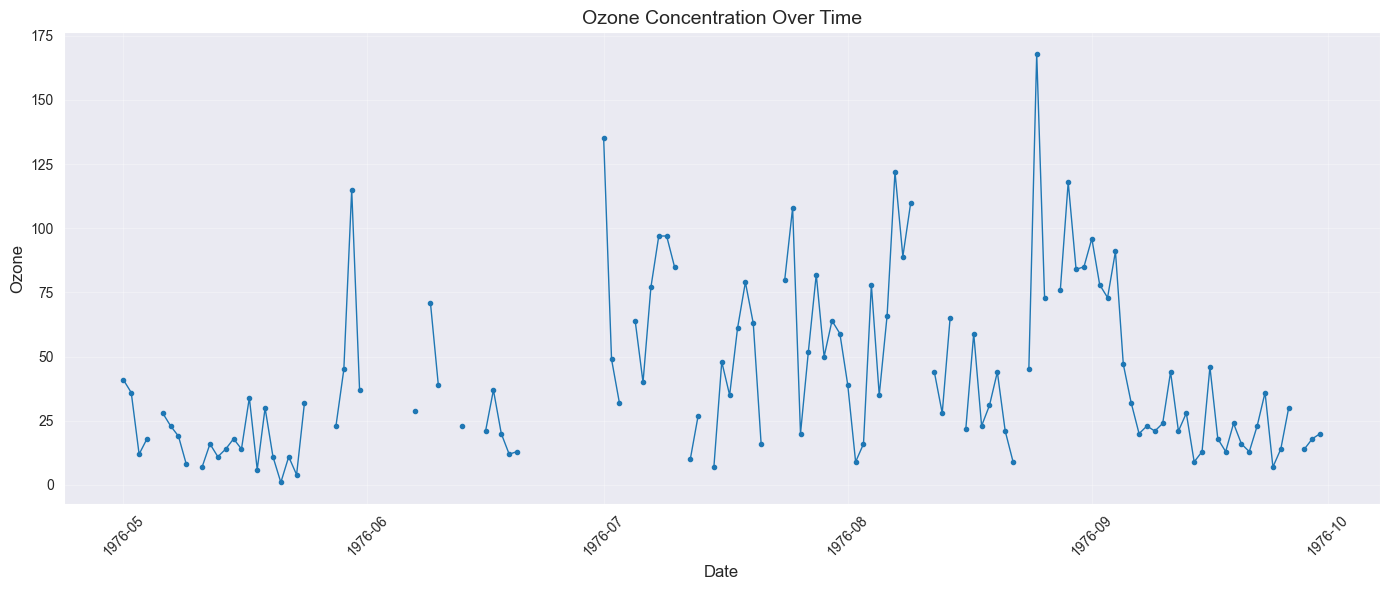

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(air_quality['Date'], air_quality['Ozone'], marker='o', markersize=3, linestyle='-', linewidth=1)
plt.title('Ozone Concentration Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ozone', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Imputation

So I have missing values, now what?

Fill in data but keep the relationship

<Axes: >

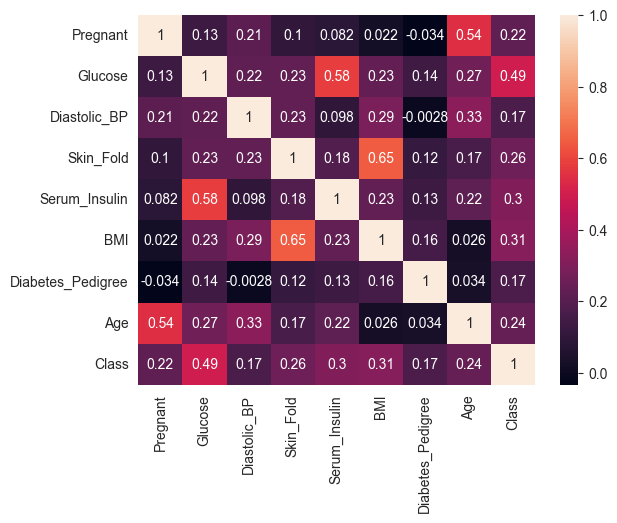

In [41]:
sns.heatmap(diabetes.corr(), annot=True)

<Axes: xlabel='Serum_Insulin', ylabel='Glucose'>

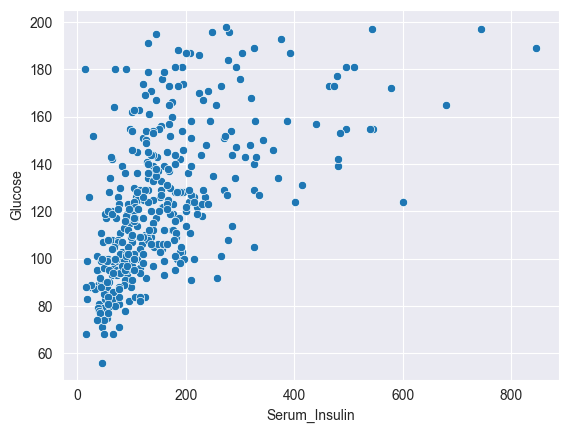

In [42]:
sns.scatterplot(data=diabetes, x='Serum_Insulin', y='Glucose')

Here are four different methods for Imputation
What happens in production?

In [47]:
from sklearn.experimental import enable_iterative_imputer

In [48]:
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

diabetes_mean = diabetes.copy(deep=True)
diabetes_median = diabetes.copy(deep=True)

diabetes_KNN = diabetes.copy(deep=True)
diabetes_MLR = diabetes.copy(deep=True)

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
KNN_imputer = KNNImputer()
MLR_imputer = IterativeImputer()

diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)
diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)
diabetes_KNN.iloc[:,:] = KNN_imputer.fit_transform(diabetes_KNN)
diabetes_MLR.iloc[:,:] = MLR_imputer.fit_transform(diabetes_MLR)

<Axes: >

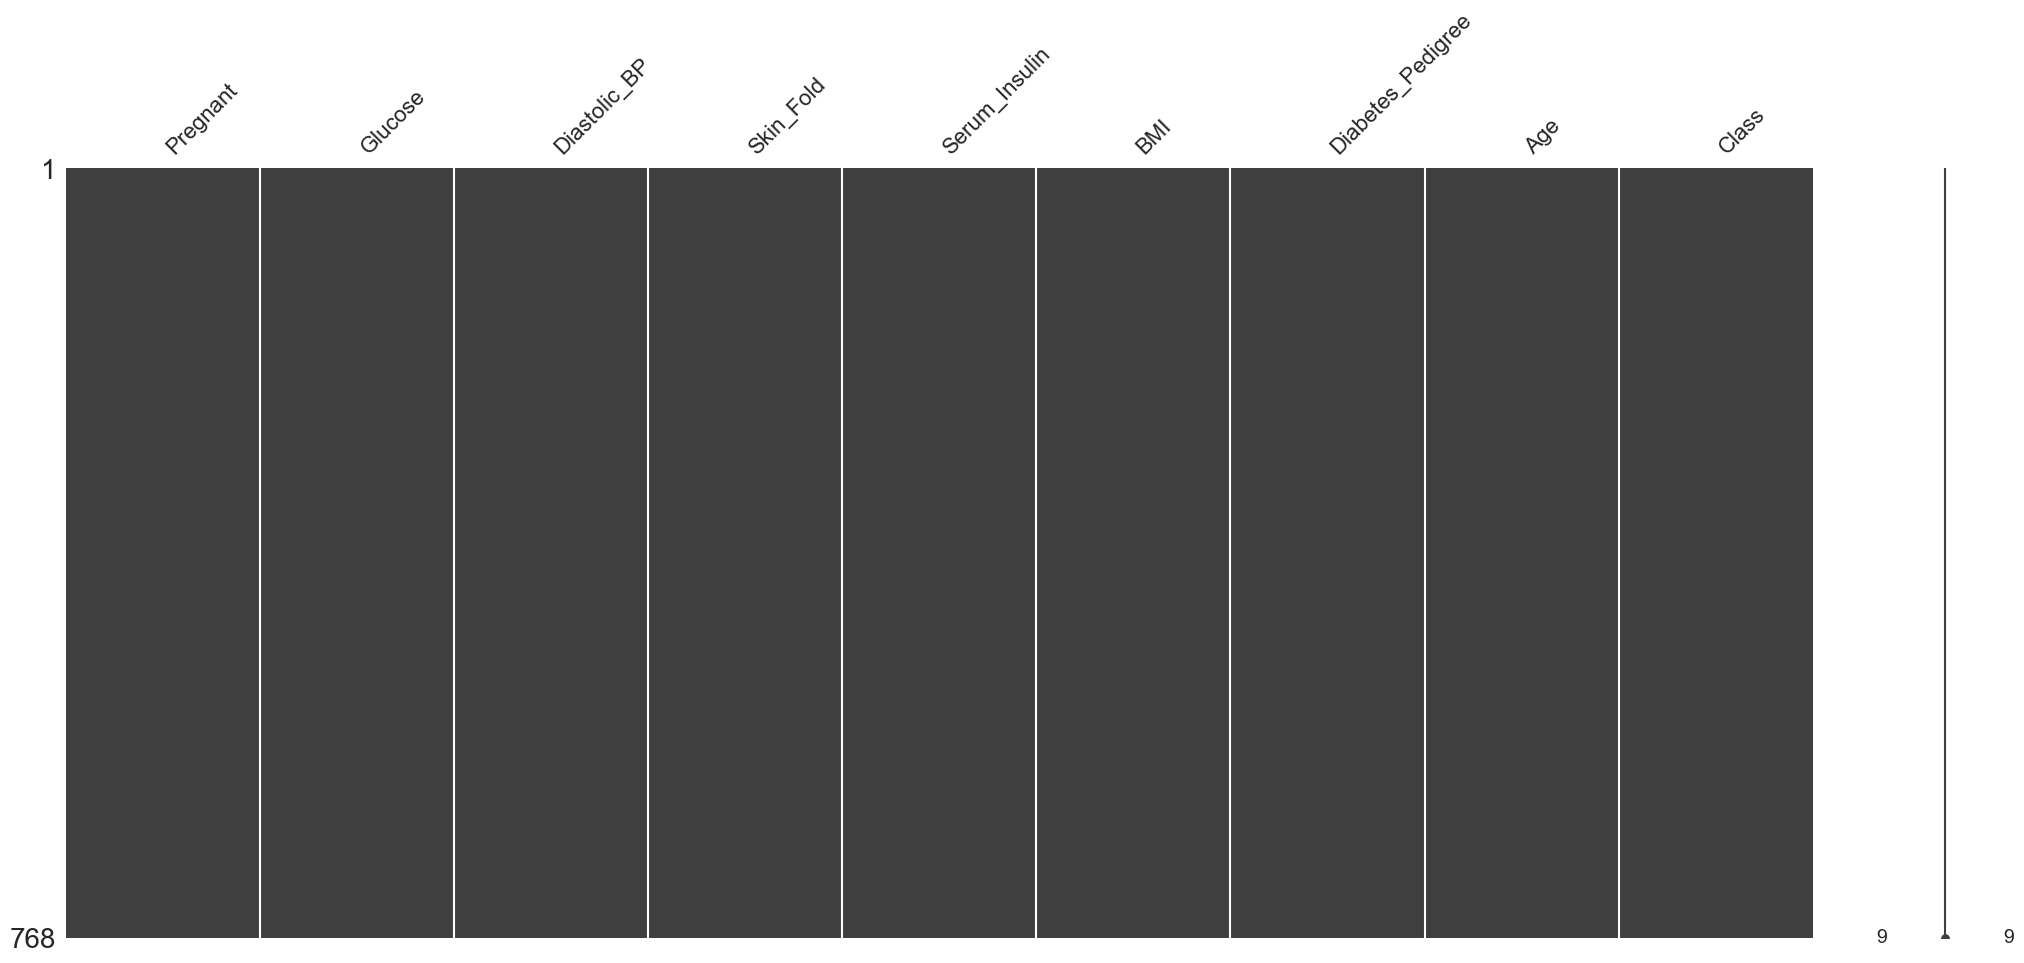

In [49]:
msno.matrix(diabetes_mean)

## Which imputed the best?

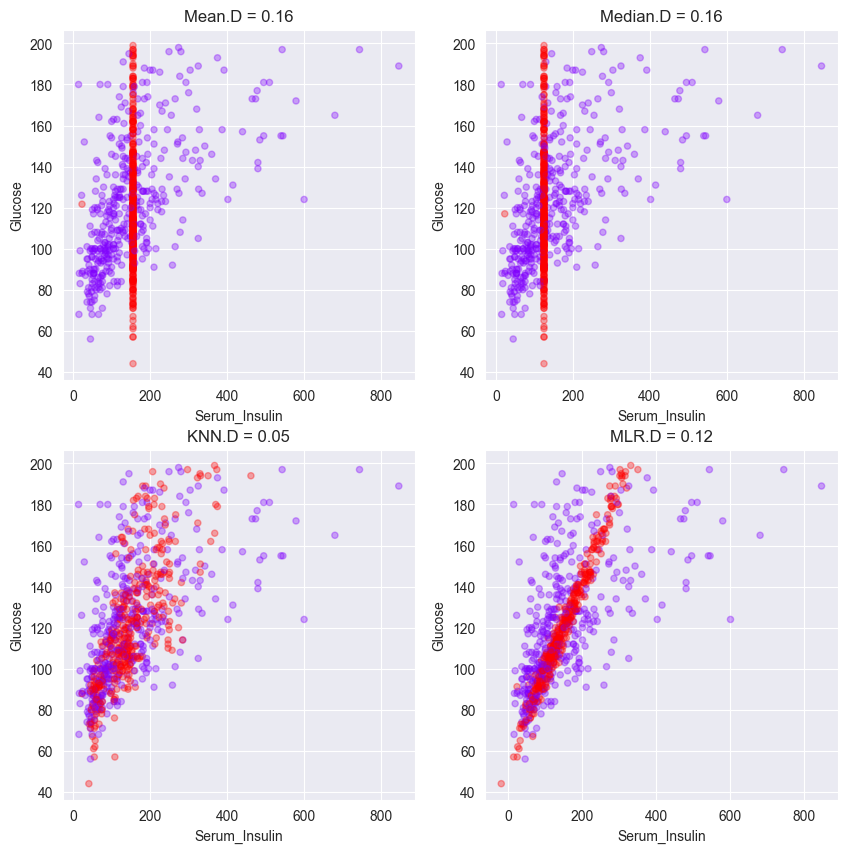

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
nulls = diabetes['Serum_Insulin'].isnull() + diabetes['Glucose'].isnull()

imputation_methods = {'Mean':diabetes_mean, 'Median':diabetes_median, 'KNN':diabetes_KNN, 'MLR':diabetes_MLR}
original_corr = 0.58
for method, axis in zip(imputation_methods, axes.flatten()):
    new_correlation = imputation_methods[method]['Serum_Insulin'].corr(imputation_methods[method]['Glucose'])
    distortion = round(np.abs(original_corr-new_correlation), 2)

    imputation_methods[method].plot(kind='scatter', x='Serum_Insulin', y='Glucose', c=nulls, cmap='rainbow', colorbar=False, title=f'{method}.D = {distortion}', alpha=1/3, ax=axis)

Always use KNN?

In [51]:
diabetes_clean = diabetes_KNN

House price prediction.